# Kaggle House Price Competition - Data Preprocessing

Initial investigation into the dataset

In [1]:
import pandas as pd
import numpy as np

# Load data
training_data = pd.read_csv('train.csv') 

# Number of features and entries
n_features = len(training_data.columns)
print(f'Number of features: {n_features}')
n_entries = training_data.shape[0]
print(f'Number of data points: {n_entries}')

# Map features with string datatype entries to integers
# Identify columns with object data type
object_columns = training_data.select_dtypes(include=['object']).columns

Number of features: 81
Number of data points: 1460


Number of features: 81\
Number of data points: 1460

In [2]:
# Map object entries to integers for each object column
for col in object_columns:
    training_data[col], _ = pd.factorize(training_data[col])

# Count missing values column-wise
missing_values = training_data.isnull().sum()

# Filter columns with missing values (count > 0)
missing_columns = missing_values[missing_values > 0]

# Print columns missing data / number of entries missing data per column
print("Missing values per column:")
print(missing_columns)

Missing values per column:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


## Missing values per column:
LotFrontage    259\
MasVnrArea       8\
GarageYrBlt     81

## What's missing:
**LotFrontage:** Linear feet of street connected to property\
**MasVnrArea:** Masonry veneer (non-structural brick wall, basically decoration) area in square feet\
**GarageYrBlt:** Year garage was built

## Solution:
Let's test deleting features with missing data outright and replacing the values with either mean or median, based on presence of outliers in the rest of the data.

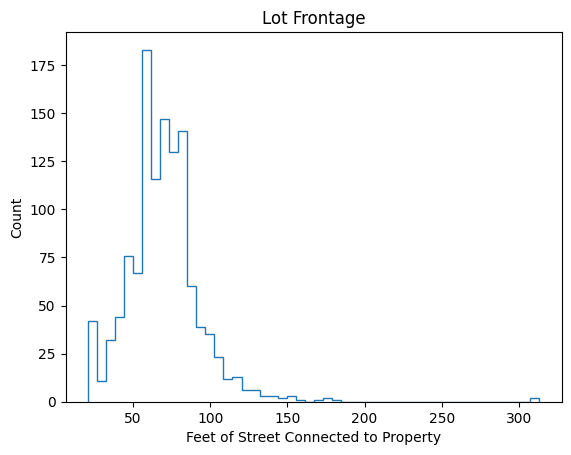

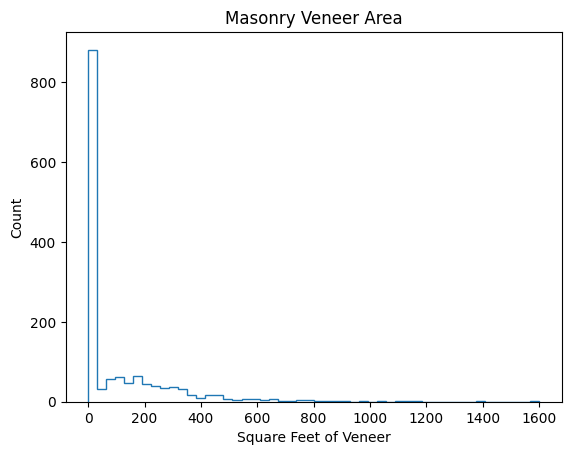

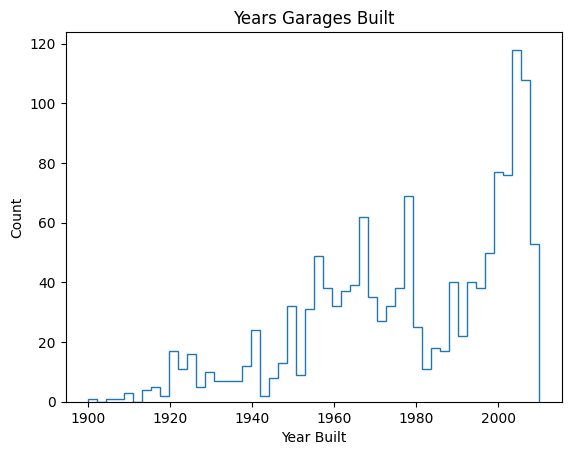

<Figure size 640x480 with 0 Axes>

In [3]:
# Plot histograms of features with missing entries to get a sense of distribution/outliers 

from matplotlib import pyplot as plt 

lf = training_data['LotFrontage'].dropna()
mva = training_data['MasVnrArea'].dropna()
gyb = training_data['GarageYrBlt'].dropna()

lfhist, lfbins = np.histogram(lf, bins=50)
mvahist, mvabins = np.histogram(mva, bins=50)
gybhist, gybbins = np.histogram(gyb, bins=50)

plt.stairs(lfhist, lfbins)
plt.title('Lot Frontage')
plt.xlabel('Feet of Street Connected to Property')
plt.ylabel('Count')
plt.show()
plt.clf()

plt.stairs(mvahist, mvabins)
plt.title('Masonry Veneer Area')
plt.xlabel('Square Feet of Veneer')
plt.ylabel('Count')
plt.show()
plt.clf()

plt.stairs(gybhist, gybbins)
plt.title('Years Garages Built')
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.show()
plt.clf()

- Lot frontage can use mean after discarding the outlier at 300ft.
- Masonry veneer can use the median value of 0.
- Year garage was built is a little tougher, but the relatively smooth distribution and lack of glaring outliers suggests the use of mean to me.

In [12]:
# Training data with missing features deleted
training_data_deleted = training_data.copy()
training_data_deleted = training_data_deleted.drop(columns=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

# Fill missing training data with imputed values 
lf_mean = lf[lf < 250].mean() # Drop outlier around 300
mva_med = mva.median()
gyb_mean = gyb.mean()

training_data_filled = training_data.copy()
training_data_filled['LotFrontage'] = training_data_filled['LotFrontage'].fillna(lf_mean)
training_data_filled['MasVnrArea'] = training_data_filled['MasVnrArea'].fillna(mva_med)
training_data_filled['GarageYrBlt'] = training_data_filled['GarageYrBlt'].fillna(gyb_mean)